# projet MT

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

In [2]:
df = pd.read_csv('../data/loan_data.csv'); df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


### Le but est de pouvoir, grace au machine learning, anticiper si il y a un risque de dégradation lors de la location d'un appartement ou d'une maison

In [94]:
# On supprime les colones contenant des NaN
df = df.dropna(axis=0, how='any') ; df

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
71,100083,0,Cash loans,1,1,1,0,103500.0,573628.5,24435.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
124,100145,0,Cash loans,0,1,1,1,202500.0,260725.5,16789.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
152,100179,0,Cash loans,0,1,0,0,202500.0,675000.0,53329.5,...,0,0,0,0,0.0,0.0,0.0,1.0,0.0,4.0
161,100190,0,Cash loans,1,1,0,0,162000.0,263686.5,24781.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
255,100295,1,Cash loans,1,1,0,1,225000.0,1019205.0,31032.0,...,1,0,0,0,0.0,0.0,0.0,6.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307358,456083,0,Cash loans,0,1,1,2,112500.0,361462.5,16051.5,...,0,0,0,0,0.0,0.0,0.0,2.0,0.0,0.0
307359,456084,0,Cash loans,0,1,1,1,99000.0,675000.0,21906.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
307407,456140,1,Cash loans,0,1,1,1,261000.0,711454.5,47673.0,...,0,0,0,0,0.0,0.0,0.0,1.0,0.0,1.0
307456,456195,0,Cash loans,0,1,1,0,94500.0,270000.0,15075.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0


In [96]:
# On remplace les objects par des valeurs que les fonctions pourront utiliser
dico = {"M":1, "F":0, "Y":1, "N":0, 'Yes':1, 'No':0}
df = df.replace(to_replace=dico, value=None) ; df

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
71,100083,0,Cash loans,1,1,1,0,103500.0,573628.5,24435.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
124,100145,0,Cash loans,0,1,1,1,202500.0,260725.5,16789.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
152,100179,0,Cash loans,0,1,0,0,202500.0,675000.0,53329.5,...,0,0,0,0,0.0,0.0,0.0,1.0,0.0,4.0
161,100190,0,Cash loans,1,1,0,0,162000.0,263686.5,24781.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
255,100295,1,Cash loans,1,1,0,1,225000.0,1019205.0,31032.0,...,1,0,0,0,0.0,0.0,0.0,6.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307358,456083,0,Cash loans,0,1,1,2,112500.0,361462.5,16051.5,...,0,0,0,0,0.0,0.0,0.0,2.0,0.0,0.0
307359,456084,0,Cash loans,0,1,1,1,99000.0,675000.0,21906.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
307407,456140,1,Cash loans,0,1,1,1,261000.0,711454.5,47673.0,...,0,0,0,0,0.0,0.0,0.0,1.0,0.0,1.0
307456,456195,0,Cash loans,0,1,1,0,94500.0,270000.0,15075.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0


In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8602 entries, 71 to 307482
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(45), object(12)
memory usage: 8.1+ MB


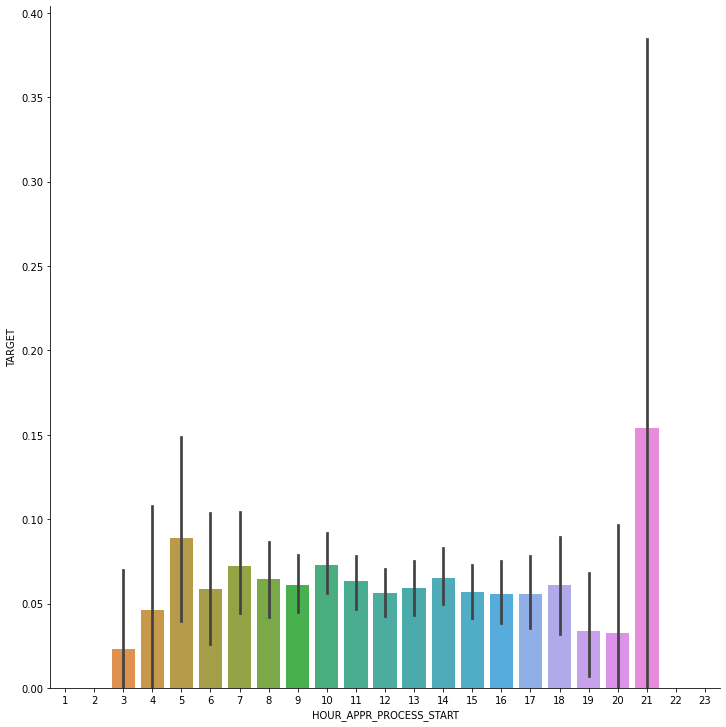

In [98]:
# Diagramme 
sns.catplot(x="HOUR_APPR_PROCESS_START", y="TARGET", data= df, kind="bar", height=10)

<AxesSubplot:>

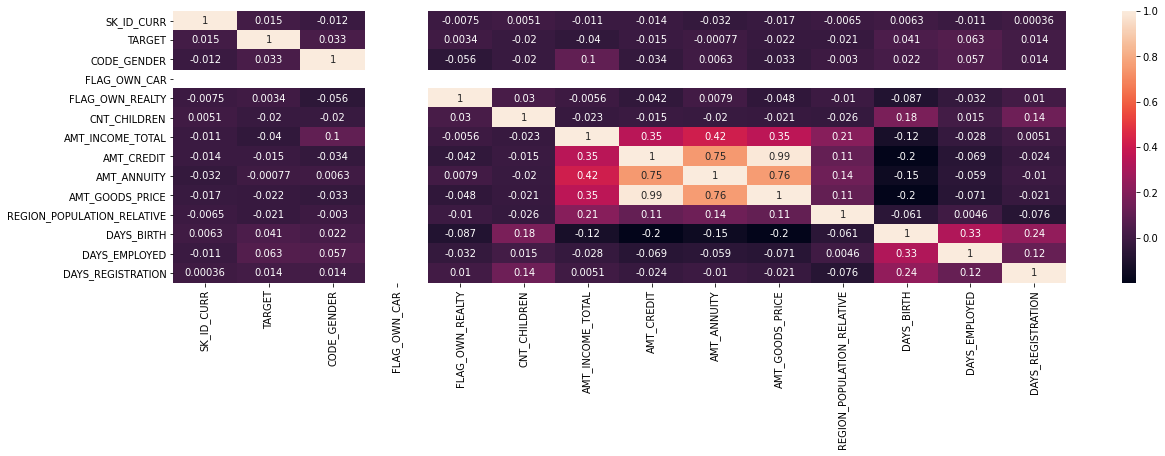

In [99]:
f, ax = plt.subplots(figsize=(20,5))
sns.heatmap(df_corr, annot=True, ax =ax)

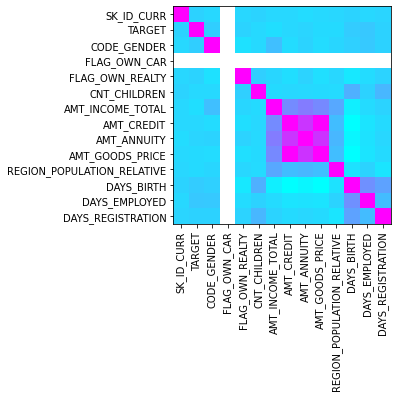

In [101]:
names = df_corr.columns
subjects = df_corr.index

# Setting the labels of x axis.
# set the xticks as student-names
# rotate the labels by 90 degree to fit the names
plt.xticks(ticks=np.arange(len(names)),labels=names,rotation=90)
# Setting the labels of y axis.
# set the xticks as subject-names
plt.yticks(ticks=np.arange(len(subjects)),labels=subjects)
# use the imshow function to generate a heatmap
# cmap parameter gives color to the graph
# setting the interpolation will lead to different types of graphs
plt.imshow(df_corr, cmap='cool',interpolation="nearest")

#### lien vers la veille de l'algorithme : https://github.com/batgar37/math_algo/blob/main/Veille%20de%20l'algo.pdf

In [102]:
X, y = make_classification(n_samples=1000, n_features=4, n_informative=2, n_redundant=0, random_state=0, shuffle=False)
clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(X, y)

RandomForestClassifier(max_depth=2, random_state=0)

In [108]:
X = df.loc[ : , df.columns != 'TARGET']
X = X.loc[ : , X.columns != 'FLAG_OWN_CAR']
X = X.loc[ : , X.columns != 'NAME_CONTRACT_TYPE']
X = X.loc[ : , X.columns != 'NAME_TYPE_SUITE']
X = X.loc[ : , X.columns != 'NAME_EDUCATION_TYPE']
X = X.loc[ : , X.columns != 'NAME_FAMILY_STATUS']
X = X.loc[ : , X.columns != 'NAME_INCOME_TYPE']
X = X.loc[ : , X.columns != 'NAME_HOUSING_TYPE']
X = X.loc[ : , X.columns != 'OCCUPATION_TYPE']
X = X.loc[ : , X.columns != 'WEEKDAY_APPR_PROCESS_START']
X = X.loc[ : , X.columns != 'ORGANIZATION_TYPE']
X = X.loc[ : , X.columns != 'FONDKAPREMONT_MODE']
X = X.loc[ : , X.columns != 'HOUSETYPE_MODE']
X = X.loc[ : , X.columns != 'WALLSMATERIAL_MODE']


#Modifier toutes les variables non int/float par des int/float au lieux de les supprimer

y = df['TARGET']

In [114]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [124]:
clf = RandomForestClassifier(n_estimators=1000)
y_score = clf.fit(X_train, y_train)

In [125]:
y_pred = clf.predict(X_test)

In [126]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(clf, X_test, y_test, scoring='accuracy').mean()
scores

0.9453808560835861

Ici on peut voir la précision de notre algorithme, environ 95 %

In [127]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1627
           1       0.00      0.00      0.00        94

    accuracy                           0.95      1721
   macro avg       0.47      0.50      0.49      1721
weighted avg       0.89      0.95      0.92      1721



/home/baptiste/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/baptiste/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/baptiste/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


En revanche on peut voir ici que notre algorithme est précis à environ 95% quand il n'y a pas de dégats. 

Les prédictions pour atticiper les potentiels dégats est nulle.

On peut donc dire que notre algorithme n'est pas bien entrainé